In [1]:
%run ./Functions_PM.ipynb

c = const.c.value
G = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value

def p(v, m, DL = False):
    return γ(v, DL)*m*v

def rotate(V, θ):
    rot = np.array([[np.cos(θ), -np.sin(θ)], [np.sin(θ), np.cos(θ)]])
    return np.dot(rot, V)

In [46]:
m_1 = M_sun*10
m_2 = M_sun*10

R_S = findR_S(m_1, m_2)

x_1 = np.array([1e2,  0.0])*R_S
x_2 = np.array([0.0,  0.0])*R_S
v_1 = np.array([0.0,  0.005])*c
v_2 = np.array([0.0,   0.])*c

x_1 = rotate(x_1, -0.4)
x_2 = rotate(x_2, -0.4)
v_1 = rotate(v_1, -0.4)
v_2 = rotate(v_2, -0.4)

p_1 = p(v_1, m_1)
p_2 = p(v_2, m_2)
P_1 = np.array([np.sqrt(np.dot(p_1, p_1)*c**2 + m_1**2*c**4)/c, p_1[0], p_1[1]])
P_2 = np.array([np.sqrt(np.dot(p_2, p_2)*c**2 + m_2**2*c**4)/c, p_2[0], p_2[1]])

s = x_1, x_2, P_1, P_2, m_1, m_2

In [47]:

t_max = 1e7*R_S/c
dt = t_max/5e4
pos1, pos2, pos_CM = run_model(s, t_max = t_max, dt = dt, mode = 'PM')

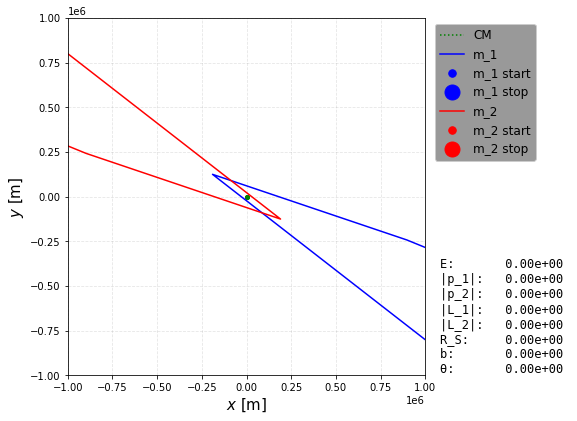

In [48]:
M = slice(0, int(len(pos1[0])), 1)
# orbPlotter(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True, DL = False)

lim = 1e6
lims = (-lim, lim)
orbPlotter_lims(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True, DL = False, xlim=lims, ylim=lims)

In [37]:
%run ./Functions_PM.ipynb

c = const.c.value
G = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value

m_1 = 10
m_2 = 10

R_S = findR_S(m_1, m_2, DL = True)

x_1 = np.array([1e6,   0.])
x_2 = np.array([0.,    0.])
v_1 = np.array([0., 0.005])
v_2 = np.array([0.,    0.])

p_1 = p(v_1, m_1, DL=True)
p_2 = p(v_2, m_2, DL=True)
P_1 = four_P(p_1, m_1, DL=True)
P_2 = four_P(p_2, m_2, DL=True)

s = x_1, x_2, P_1, P_2, m_1, m_2

t_max = 1e9
dt = t_max/1e6
pos1PM1, pos2PM1, pos_CMPM1 = run_model(s, t_max = t_max, dt = dt, mode = 'PM', DL = True)

PMData1 = np.array([pos1PM1[0][0:-1:10], pos1PM1[1][0:-1:10], pos2PM1[0][0:-1:10], pos2PM1[1][0:-1:10], pos_CMPM1[0][0:-1:10], pos_CMPM1[1][0:-1:10]])
np.savetxt("PMData1.csv", PMData1, delimiter=",")

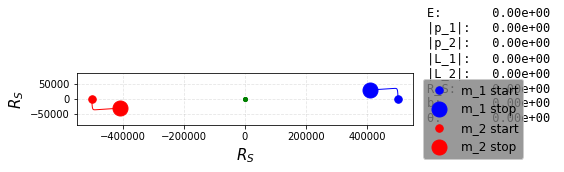

In [39]:
PMData1 = np.genfromtxt("PMData1.csv", delimiter=',')
pos1, pos2, pos_CM = PMData1[0:2], PMData1[2:4], PMData1[4:6]

M = slice(0, int(len(pos1PM1[0])), 1)
orbPlotter(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True, DL = True)

# lim = 1e5
# lims = (-lim, lim)
# orbPlotter_lims(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True, DL = True, xlim=lims, ylim=lims)

In [7]:
m_1 = 8*M_sun
m_2 = 10*M_sun

R_S = findR_S(m_1, m_2)

def rotate(V, θ):
    rot = np.array([[np.cos(θ), -np.sin(θ)], [np.sin(θ), np.cos(θ)]])
    return np.dot(rot, V)

x_1 = np.array([0.,  -500])*R_S
x_2 = np.array([-100., 0.])*R_S
v_1 = np.array([0.,   0.41])*c
v_2 = np.array([0.,    0.])*c

x_1 = rotate(x_1, 0.3)
x_2 = rotate(x_2, 0.3)
v_1 = rotate(v_1, 0.3)
v_2 = rotate(v_2, 0.3)

p_1 = p(v_1, m_1)
p_2 = p(v_2, m_2)
P_1 = np.array([np.sqrt(np.dot(p_1, p_1)*c**2 + m_1**2*c**4)/c, p_1[0], p_1[1]])
P_2 = np.array([np.sqrt(np.dot(p_2, p_2)*c**2 + m_2**2*c**4)/c, p_2[0], p_2[1]])

s = x_1, x_2, P_1, P_2, m_1, m_2

In [8]:
t_max = 1e6*R_S/c
dt = t_max/5e4
pos1, pos2, pos_CM = run_model(s, t_max = t_max, dt = dt, mode = 'PM')

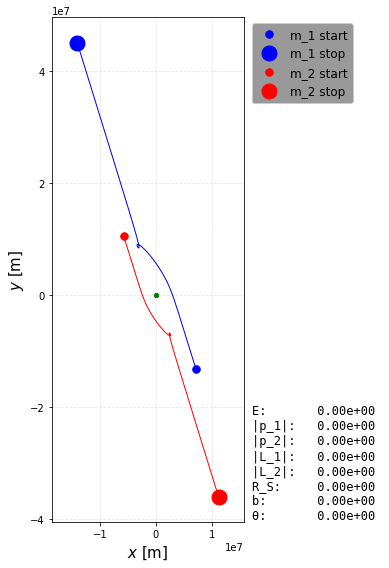

In [9]:
M = slice(0, int(len(pos1[0])), 1)
orbPlotter(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True, DL = False)

# lim = 2*R_S
# lims = (-lim, lim)
# orbPlotter_lims(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True, DL = False, xlim=lims, ylim=lims)

## $\downarrow$ Weird case (check with non-dimensionalized equations)

In [10]:
m_1 = M_sun
m_2 = M_sun
R_S = findR_S(m_1, m_2)
x_1 = np.array([-10., 0.])*R_S
x_2 = np.array([0.,     0.])*R_S
v_1 = np.array([0.,    0.5])*c
v_2 = np.array([0.,     0.])*c

p_1 = p(v_1, m_1)
p_2 = p(v_2, m_2)
P_1 = np.array([np.sqrt(np.dot(p_1, p_1)*c**2 + m_1**2*c**4)/c, p_1[0], p_1[1]])
P_2 = np.array([np.sqrt(np.dot(p_2, p_2)*c**2 + m_2**2*c**4)/c, p_2[0], p_2[1]])

s = x_1, x_2, P_1, P_2, m_1, m_2

In [11]:
t_max = 1e6*R_S/c
dt = t_max/1e5
pos1, pos2, pos_CM = run_model(s, t_max = t_max, dt = dt, mode = 'PM')

Code interrupted: Radial Dip


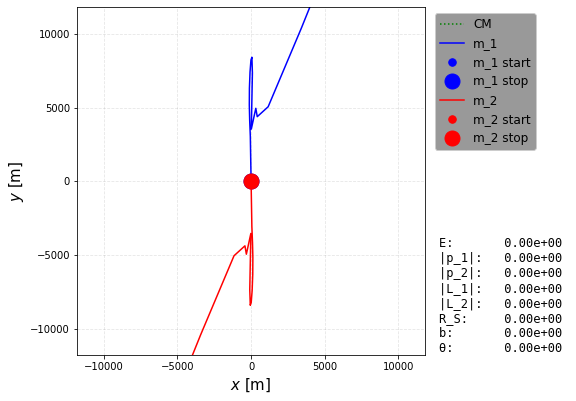

In [12]:
M = slice(0, int(len(pos1[0])), 1)
# orbPlotter(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True, DL = False)

lim = 2*R_S
lims = (-lim, lim)
orbPlotter_lims(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True, DL = False, xlim=lims, ylim=lims)

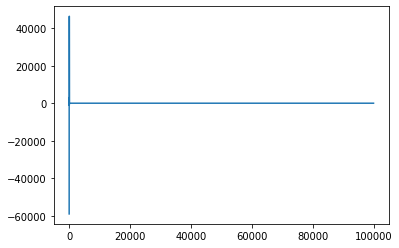

In [13]:
travel = []
for i in range(len(pos1[0])):
    travel.append(pos1[0,i] - pos1[0, i-1])

t = np.arange(0, len(travel))
S = slice(0, len(travel), 1)
plt.plot(t[S], travel[S])
